# Getting Trajectory objects from videos

There are several methods to discern the position of an object through consecutive frames of a video.

## Color Matching

If the input is a video where the color of the object you want to track is quite different from everything else you can exploit this fact to capture the whole trajectory by using the `ColorMatching` algorithm implemented in **yupi**:

In [1]:
from yupi.tracking import ColorMatching
algorithm = ColorMatching((180,125,35), (190,135,45))

Where the parameters passed to the `ColorMatching` constructor are the lower and upper bounds of the color vector in the selected color space, `BGR` by default.

Next, we can define a Region-of-Interest (`ROI`), the neighborhood of pixels, around the last known position of the object, that are going to be explored in the following frame. Its size will depend on the specific video and the desired tracking object.

In [2]:
from yupi.tracking import ROI
roi = ROI((100, 100))

Now, we can create an `ObjectTracker`. Its function is to apply the selected algorithm along the `ROI` in a frame to estimate the following position of the object.

In [3]:
from yupi.tracking import ObjectTracker
blue_ball = ObjectTracker('blue', algorithm, roi)

Finally, the tracker is passed to the `TrackingScenario`, the one in charge of iterating the video and making the trackers update its value on each frame. It also allows several trackers to coexist while processing the same video.

In [4]:
from yupi.tracking import TrackingScenario
scenario = TrackingScenario([blue_ball])

The `track()` method of a `TrackingScenario` object, will produce a list of all the `Trajectory` objects the `TrackingScenario` tracked among all the frames of the video (only one in this case):

In [5]:
retval, tl = scenario.track('resources/videos/demo.avi', pix_per_m=10)

13:40:34 [INFO] Open the video window to select blue's center
13:40:36 [INFO] ROI initialized. Press any key to continue.
13:40:37 [INFO] ROI initialized. Press any key to continue.
13:40:38 [INFO] Waiting for ROI initialization. Please click on the center of the blue's ROI on the video window.
13:40:38 [INFO] ROI initialized in blue
13:40:38 [INFO] All trackers were initialized
13:40:38 [INFO] Processing frames
13:40:52 [INFO] All frames were processed


In this case, the list `tl` will contain only one object describing the trajectory of the blue ball in the video. Let's inspect the resulting trajectory:

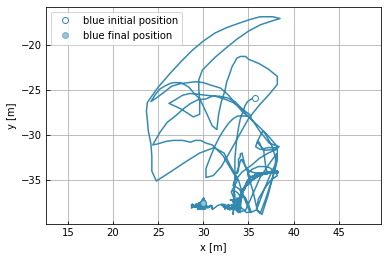

In [6]:
from yupi.graphics import plot_2D
plot_2D(tl)

## Other Tracking Algorithms

There are several other algorithms available in **yupi** (see [Algorithms](https://yupi.readthedocs.io/en/latest/api_reference/tracking/algorithms.html) section on the [API Reference](https://yupi.readthedocs.io/en/latest/api_reference/api_reference.html) in the official documentation). For a quick overview, we recommend you to inspect [Example 6](https://github.com/yupidevs/yupi_examples/blob/master/example_006.py) that contains a detailed comparison of them while developing a specific task.

## Tracking objects when the camera is moving

**Yupi** is able to estimate the motion of the camera (under certain circumstances) and integrate this information while reconstructing the trajectory of the tracked object. [Example 5](https://github.com/yupidevs/yupi_examples/blob/master/example_005.py) shows a typical application of this feature.